<a href="https://colab.research.google.com/github/achrefsola/Mern_training_managment_web_app/blob/main/Pr%C3%A9diction_des_prix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

linear regression


RMSE Score on Test set: 70060.52


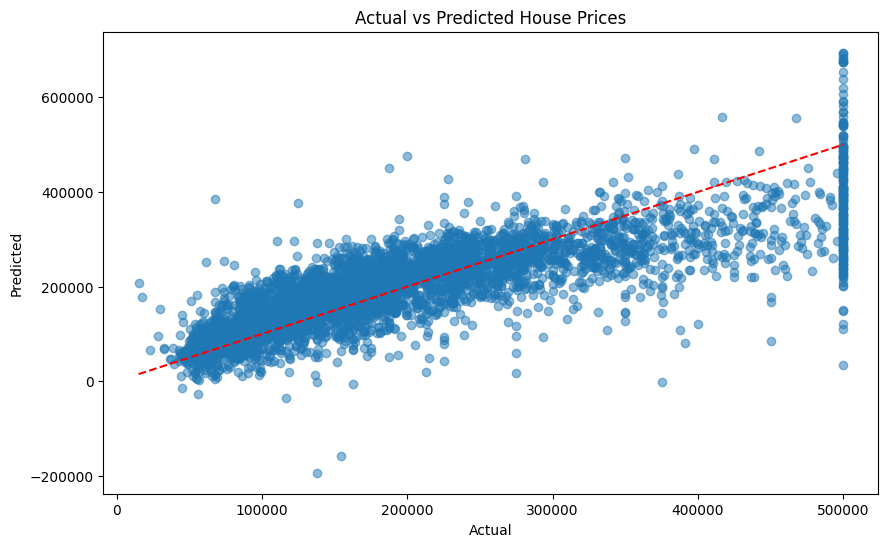

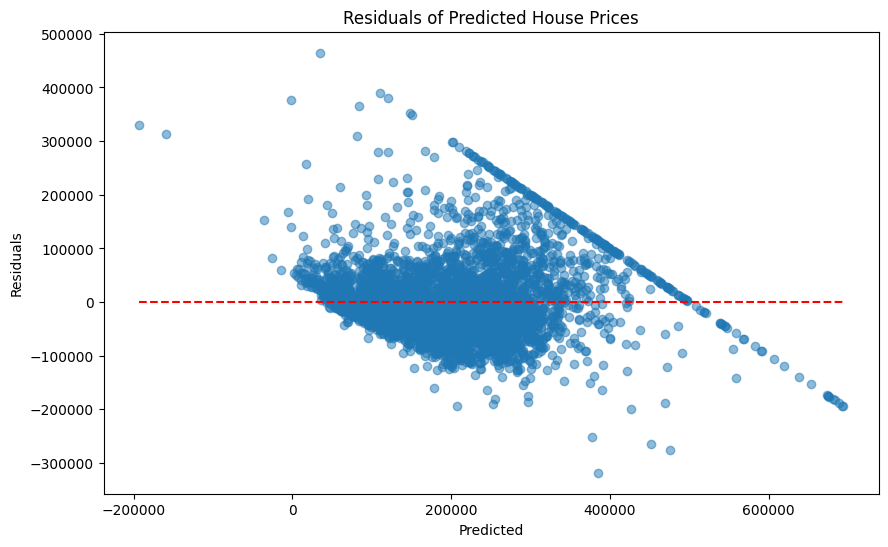

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('housing.csv')

# Convert categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Define features and target
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score on Test set: {rmse:.2f}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted House Prices')
plt.show()

random forest

RMSE Score on Test set: 49008.79


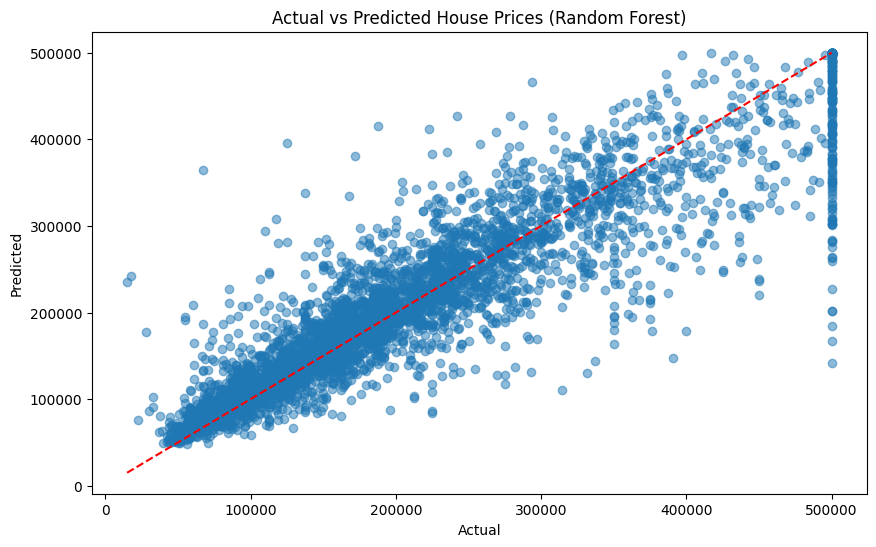

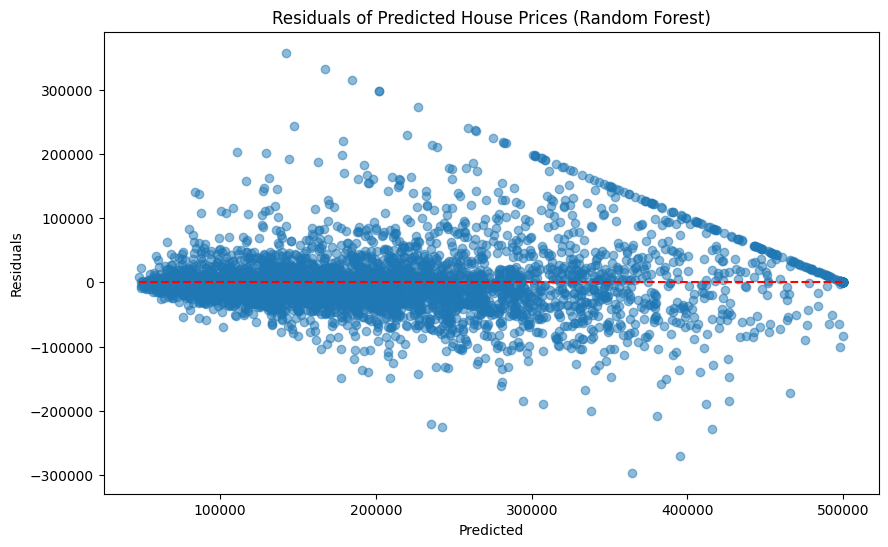

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('housing.csv')

# Convert categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Define features and target
X = df.drop(['median_house_value'], axis=1)
y = df['median_house_value']

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score on Test set: {rmse:.2f}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices (Random Forest)')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted House Prices (Random Forest)')
plt.show()


neural network

Epoch 1/50
413/413 [==============================] - 4s 4ms/step - loss: 56026976256.0000 - val_loss: 56314294272.0000
Epoch 2/50
413/413 [==============================] - 1s 2ms/step - loss: 53942239232.0000 - val_loss: 52111093760.0000
Epoch 3/50
413/413 [==============================] - 1s 2ms/step - loss: 47175135232.0000 - val_loss: 42722336768.0000
Epoch 4/50
413/413 [==============================] - 1s 2ms/step - loss: 36245291008.0000 - val_loss: 30535329792.0000
Epoch 5/50
413/413 [==============================] - 1s 2ms/step - loss: 24652165120.0000 - val_loss: 19845292032.0000
Epoch 6/50
413/413 [==============================] - 1s 2ms/step - loss: 16287005696.0000 - val_loss: 13619545088.0000
Epoch 7/50
413/413 [==============================] - 1s 2ms/step - loss: 12570097664.0000 - val_loss: 11074508800.0000
Epoch 8/50
413/413 [==============================] - 1s 2ms/step - loss: 11027527680.0000 - val_loss: 9976253440.0000
Epoch 9/50
413/413 [=====================

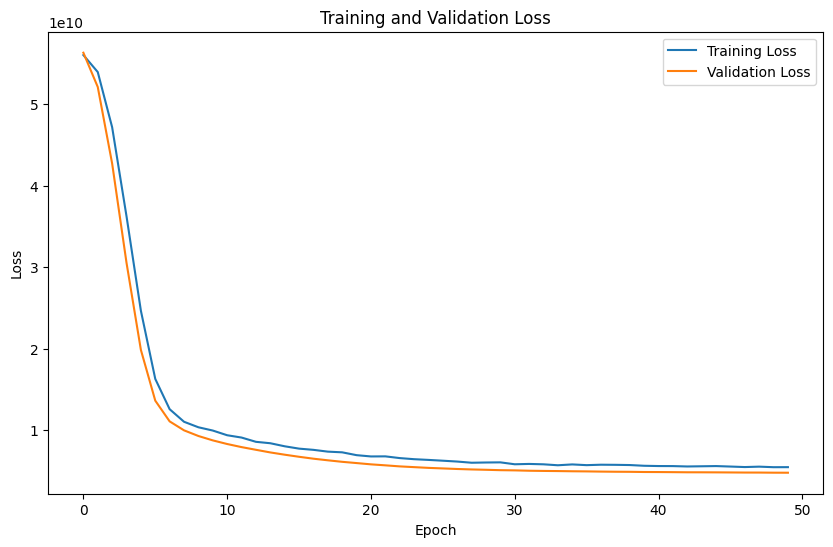

129/129 [==============================] - 0s 1ms/step
RMSE Score on Test set: 68987.80


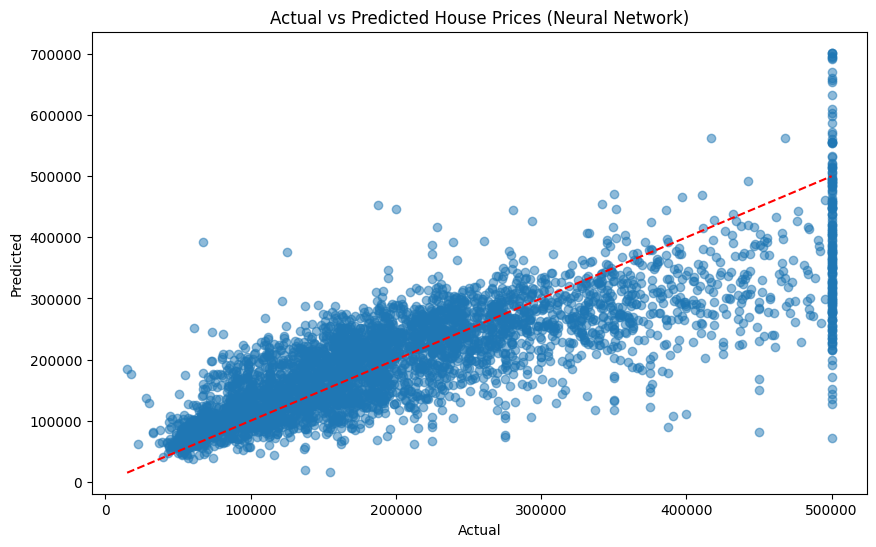

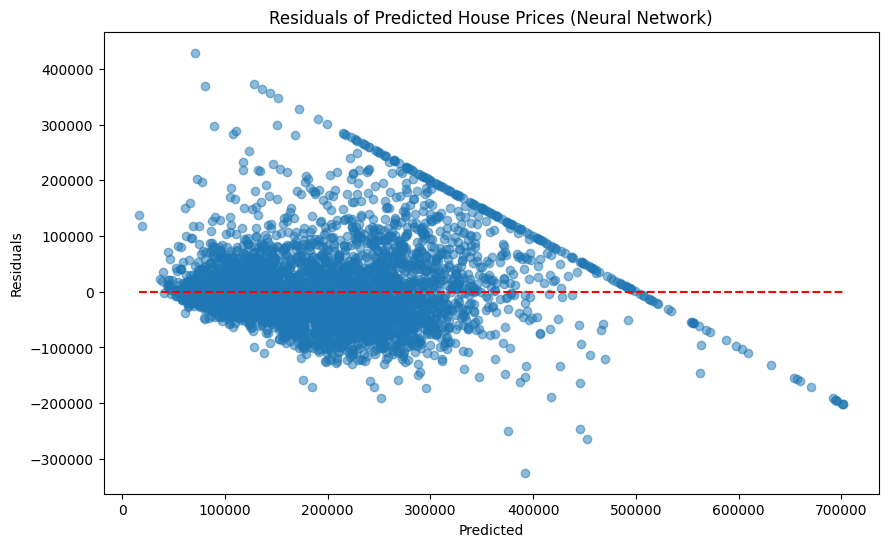

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('housing.csv')

# Convert categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Handle missing values
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Define features and target
X = df_imputed.drop(['median_house_value'], axis=1)
y = df_imputed['median_house_value']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
y_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE Score on Test set: {rmse:.2f}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted House Prices (Neural Network)')
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed', colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals of Predicted House Prices (Neural Network)')
plt.show()


# D) Descripion de l'architecture de reaseau de neurone :
L'architecture du réseau de neurones que vous avez utilisée dans votre modèle est composée de trois couches de neurones :

Couche d'entrée (couche Dense) :

Cette couche est la première couche du réseau de neurones.
Elle contient 64 neurones.
La fonction d'activation utilisée est ReLU (Rectified Linear Unit).
La forme d'entrée de cette couche correspond au nombre de caractéristiques dans vos données, définie par la forme de X_train_scaled.shape[1].
Couche de dropout :

Cette couche est ajoutée pour régulariser le modèle et prévenir le surajustement en abandonnant aléatoirement un pourcentage des neurones de la couche précédente pendant l'entraînement.
Le taux de dropout est de 0.5, ce qui signifie que la moitié des neurones sont abandonnés pendant l'entraînement.
Deuxième couche cachée (couche Dense) :

Cette couche est la deuxième couche du réseau de neurones.
Elle contient 32 neurones.
La fonction d'activation utilisée est ReLU.
Couche de sortie (couche Dense) :

Cette couche est la couche de sortie du réseau de neurones.
Elle contient un seul neurone car il s'agit d'un problème de régression où nous essayons de prédire une valeur continue (le prix des maisons).
Aucune fonction d'activation n'est spécifiée, ce qui signifie que c'est une couche linéaire par défaut, ce qui est approprié pour la régression.
Ce modèle est compilé avec l'optimiseur Adam et la perte est mesurée en utilisant l'erreur quadratique moyenne (mean squared error) car il s'agit d'un problème de régression.

# E) Comparaison des résultats :
Dans les trois approches utilisées pour prédire les prix des maisons, voici les résultats obtenus sur l'ensemble de test :

Régression linéaire :

RMSE Score sur l'ensemble de test : 70060.52
Random Forest Regressor :

RMSE Score sur l'ensemble de test : 49008.79
Réseau de neurones :

RMSE Score sur l'ensemble de test : 68987.80
En comparant les résultats, on constate que le Random Forest Regressor a donné la plus faible erreur quadratique moyenne (RMSE), ce qui indique qu'il a mieux performé en termes de prédiction par rapport à la régression linéaire et au réseau de neurones dans ce cas particulier. Cependant, il est toujours important de prendre en compte d'autres facteurs tels que la complexité du modèle, le temps d'entraînement et la facilité d'interprétation lors du choix de l'algorithme de prédiction.







